# CSE 802 Homework 1
Joe Freedman - A47774975 <br> 2/12/2018

---
# 1. The Iris (Flower) Dataset Analysis

In [1]:
import pandas as p
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

In [2]:
columns = ["x1", "x2", "x3", "x4", "class"]
data = p.read_table('iris_data.txt', sep="\t", header=None, names=columns)
data.head()

,x1,x2,x3,x4,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [3]:
x1 = data["x1"]
x2 = data["x2"]
x3 = data["x3"]
x4 = data["x4"]

### (a) Feature Histograms

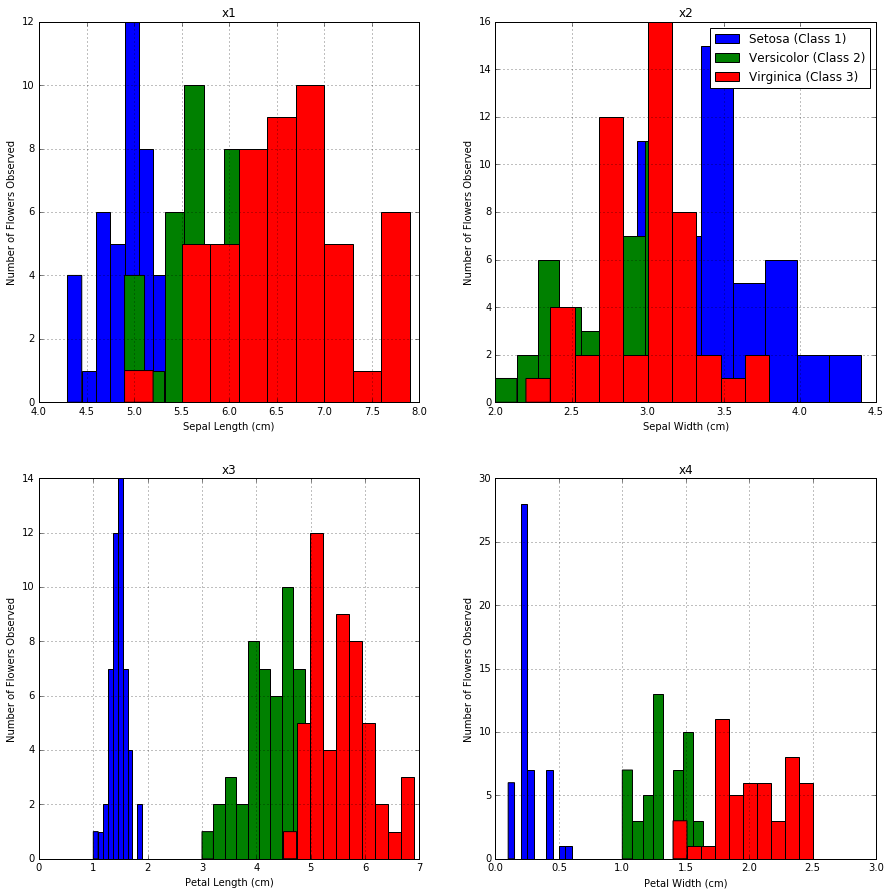

In [4]:
fig, axs = plt.subplots(2,2)

axs[0][0].set_title(columns[0])
axs[0][1].set_title(columns[1])
axs[1][0].set_title(columns[2])
axs[1][1].set_title(columns[3])

axs[0][0].set_xlabel("Sepal Length (cm)")
axs[0][1].set_xlabel("Sepal Width (cm)")
axs[1][0].set_xlabel("Petal Length (cm)")
axs[1][1].set_xlabel("Petal Width (cm)")

axs[0][0].set_ylabel("Number of Flowers Observed")
axs[0][1].set_ylabel("Number of Flowers Observed")
axs[1][0].set_ylabel("Number of Flowers Observed")
axs[1][1].set_ylabel("Number of Flowers Observed")

x1[data["class"] == 1].hist(ax=axs[0][0], figsize=(15,15), label="Setosa (Class 1)")
x1[data["class"] == 2].hist(ax=axs[0][0], label="Versicolor (Class 2)")
x1[data["class"] == 3].hist(ax=axs[0][0], label="Virginica (Class 3)")

x2[data["class"] == 1].hist(ax=axs[0][1], label="Setosa (Class 1)")
x2[data["class"] == 2].hist(ax=axs[0][1], label="Versicolor (Class 2)")
x2[data["class"] == 3].hist(ax=axs[0][1], label="Virginica (Class 3)")

x3[data["class"] == 1].hist(ax=axs[1][0], label="Setosa (Class 1)")
x3[data["class"] == 2].hist(ax=axs[1][0], label="Versicolor (Class 2)")
x3[data["class"] == 3].hist(ax=axs[1][0], label="Virginica (Class 3)")

x4[data["class"] == 1].hist(ax=axs[1][1], label="Setosa (Class 1)")
x4[data["class"] == 2].hist(ax=axs[1][1], label="Versicolor (Class 2)")
x4[data["class"] == 3].hist(ax=axs[1][1], label="Virginica (Class 3)")

axs[0][1].legend()

(a) Based on the plots, x3 (petal length) and x4 (petal width) are likely to be useful features for distinguishing the 3 classes. This is because the histograms for those features do not overlap with eachother as much as they do in the x1 (sepal length) and x2 (sepal width) plots. The setosa flower (class 1 - represented by blue) histogram is completely seperated in both the petal length and petal width plots. This does not necessarily indicate that there will never be a setosa flower with a petal length or petal width outside of its histogram range, however, the probability based on the histogram is unlikely. Similarly with the histograms for versicolor (class 2 - represented by green) and virginica flowers (class 3 - represented by red). Though they don't indicate that examples of those features in those classes will always be more different from each other than, it is likely based on their histograms.

(b) The classes that are likely to overlap with each other to a great extent are versicolor flowers (class 2) and virginica flowers (class 3). This is because in all 4 feature plots, the versicolor and virginica histograms overlapped in some way, whereas the setosa (class 1) histograms in general were less similar than the other two.

### (b) Scatter Plots

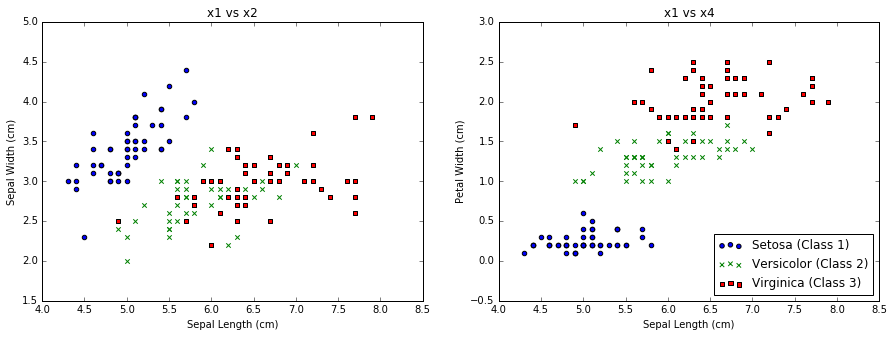

In [5]:
fig, axs = plt.subplots(1,2)

x1x2 = data[["x1", "x2", "class"]]
x1x2[data["class"] == 1].plot.scatter(x="x1", y="x2", c="blue", marker="o", ax=axs[0], figsize=(15,5))
x1x2[data["class"] == 2].plot.scatter(x="x1", y="x2", c="green", marker="x", ax=axs[0], figsize=(15,5))
x1x2[data["class"] == 3].plot.scatter(x="x1", y="x2", c="red", marker="s", ax=axs[0], figsize=(15,5))

x1x4 = data[["x1", "x4", "class"]]
x1x4[data["class"] == 1].plot.scatter(x="x1", y="x4", c="blue", marker="o", ax=axs[1], figsize=(15,5), \
                                      label="Setosa (Class 1)")
x1x4[data["class"] == 2].plot.scatter(x="x1", y="x4", c="green", marker="x", ax=axs[1], figsize=(15,5), \
                                      label="Versicolor (Class 2)")
x1x4[data["class"] == 3].plot.scatter(x="x1", y="x4", c="red", marker="s", ax=axs[1], figsize=(15,5), \
                                      label="Virginica (Class 3)")

axs[1].legend(loc=4)

axs[0].set_title("x1 vs x2")
axs[1].set_title("x1 vs x4")

axs[0].set_xlabel("Sepal Length (cm)")
axs[0].set_ylabel("Sepal Width (cm)")

axs[1].set_xlabel("Sepal Length (cm)")
axs[1].set_ylabel("Petal Width (cm)")

The second feature subset (x1, x4) is likely to be more useful than the first feature subset (x1, x2) for seperating the 3 classes. This is because in the (x1, x4) scatter plot, it is easier to find a less complex decision boundary to seperate the space into 3 regions, each containing primarily 1 class.

### (c) 3-D Scatter Plot

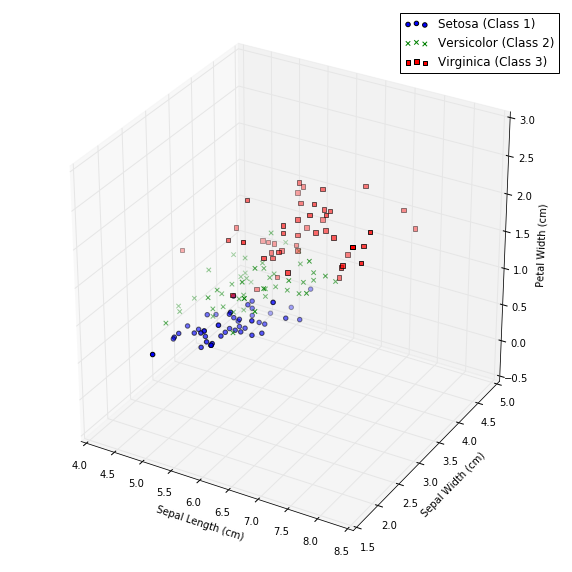

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x1x2x4 = data[["x1", "x2", "x4", "class"]]
ax.scatter(x1x2x4[data["class"] == 1]["x1"], x1x2x4[data["class"] == 1]["x2"], \
           x1x2x4[data["class"] == 1]["x4"], c="blue", marker="o", label="Setosa (Class 1)")
ax.scatter(x1x2x4[data["class"] == 2]["x1"], x1x2x4[data["class"] == 2]["x2"], \
           x1x2x4[data["class"] == 2]["x4"], c="green", marker="x", label="Versicolor (Class 2)")
ax.scatter(x1x2x4[data["class"] == 3]["x1"], x1x2x4[data["class"] == 3]["x2"], \
           x1x2x4[data["class"] == 3]["x4"], c="red", marker="s", label="Virginica (Class 3)")

ax.legend()

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Width (cm)')

Based on this scatter plot, it appears that setosa flowers (class 1) and and versicolor (class 2) flowers overlap with each other to a great extent. This is in contrast to the 2-D scatter plot that plotted sepal length against petal width that showed setosa flowers very isolated from the other two classes. In this 3-D scatter plot, the virginica flowers (class 3) are very spread out along the sepal width axis and very high up on the petal width axis, so it doesn't appear that it overlaps much with either of the other classes.

---
## 2. Supervised, Unsupervised, or Reinforcement Examples

(a) Teaching a computer to play chess - **Reinforcement** because there is not necessarily a right/wrong decision to be made, but rather the outcome of each decision is a collection of all the decisions made throughout the game, so using a reward versus penalty system would be the best learning scheme for a computer to learn to play chess.
        
(b) Given a set of sea-shells, determining if they can be grouped into multiple categories - **Unsupervised** because there is no labeled training data for the sea-shells. The goal is "pattern disovery" rather than classifying each sea-shell into a known class.

(c) Determining the make and model of a car based on its side-view image - **Supervised** because there would have to be some labeled training data for the system. The system is seperating the images into a group of known classes based on their 

(d) Predicting whether it would rain or not in the next 24 hours based on current weather conditions 
such as precipitation, humidity, temperature, wind, pressure, etc. - **Supervised** because there is labeled training data that contains the feature vectors of current weather conditions and each is labeled whether it would rain or not. Then for the weather prediction, it could learn from those feature vectors to make a prediction of whether it will rain or not.

(e) Dividing a digital image into multiple regions such that each region has a distinct color or texture - **Unsupervised** because there is no training data. The system is finding the patterns in the pixels into each distinct color or texture without using labeled training data.

---
## 3. Description of Terms

(a) **Generalization** - The idea of using a number of features (feature vector) to represent an object or a class in a way that allows each class to be separated (or mostly separated) from the others. For example, using the lightness and width of a fish as features to describe it so that there is a rule that can be used to separate (or mostly separate) seabass from salmon. 

(b) **Loss function** - A loss function is a way to quantify a misclassification as well as compare how costly is to make that misclassification versus another. For example, in a food recognition system to price items at a grocery store, misclassifying caviar as quinoa may cost the store much more money than vice-versa. In this case the loss associated with misclassifying caviar is greater than misclassifying quinoa. 

(c) **Decision boundary** - A point or set of points in a feature space that is/are used as a rule to seperate classes. For example if the height of an animal is used as a feature to separate giraffes from chimpanzees, there may be a decision boundary at 8 feet and if the measured height of an animal is greater than 8 feet, classify the animal as a giraffe, otherwise classify it as a chimpanzee. In this case, 8 feet would be a decision boundary.

---
# 4. Flight types in soaring birds Paper Analysis

(a) Briefly describe this system based on the pattern recognition terminology developed in class: (i) sensors used; (ii) features extracted; and (iii) classification scheme. How many features (i.e., d) and classes (i.e., c) are present? **Daily Diary devices, which include a tri-axial accelerometer, tri-axial magnetometer and barometric
pressure sensor, where used as sensors to collect data. They were attached to two different species of birds, the Andean condor and the Eurasian griffon. Five Andean condors were used for data collection and a single Eurasian griffon was used on 3 seperate flights. The Daily Diary attached to the griffon also had a differential pressure sensor. These sensors allowed a lot of data to be collected. Ultimately, the features that were used were geomagnetic field strength, altitude, and heave. Each was calculated with the data measured by the Daily Diary devices. K-Nearest Neighbor (KNN) cluster analysis was used as the classification scheme. There are 3 features and 4 classes.**

(b) How was training accomplished? How many data points were available in the training set? How were labels assigned to the data points? **For training, KNN was applied to each of the five Andean condors separately, where training sets consisted of 12,000 data points. Data was manually labeled after visual inspection of time series plots made in DDMT. Data was labeled as one of the 4 classes if the behavior was observed for at least 30 seconds.**

(c) What metrics were used to evaluate classifier performance? **Acuracy, precision, and recall were used to evaluate classifier performance. These were all calculated through combinations of the True Negative, True Positive, False Negative, and False Positive rates.**

(d) In your opinion, did the proposed pattern recognition system perform well? Why or why not? **I do not think that the proposed pattern recognition system performed well. I do think this is a very tough problem to solve because accurate, precise data collection is very difficult with animals like this. It is also difficult to label the data very carefully simply based on visual inspection. It did not appear that the griffon's data was used for training at all either, which definitely could have impacted performance. I think it would have been better if there were more birds of each species and an equal number of each. In addition it would have been better if the classification was only done on a single type of bird rather than using both species.**

---
# 5. Solving for K in PDF

In [6]:
%%latex
Given PDF $p(x) = Kx^3(10-x)$ that is non-zero in the range $0 \leq x \leq 10$, solve for constant K: $$$$
Because $p(x)$ is a probability density function, take the integral evaluation from 0 to 10 and set that equal to 1. 
$$$$
$$\int_{0}^{10} Kx^3(10-x)dx = 1$$ $$$$
$$=>K\int_{0}^{10} (10x^3-x^4)dx = 1 $$ $$$$
Now evaluate the integral and solve for K. $$$$
$$K\bigg[\frac{10x^4}{4} - \frac{x^5}{5}\bigg]\biggl|_{0}^{10} = 1$$ $$$$
$$=>K\bigg[\bigg(\frac{10(10)^4}{4} - \frac{(10)^5}{5}\bigg)-
           \bigg(\frac{10(0)^4}{4} - \frac{(0)^5}{5}\bigg)\bigg] = 1$$ $$$$
$$=>K\bigg(\frac{10^5}{4} - \frac{10^5}{5}\bigg) = 1$$ $$$$
$$=>K\Big(25,000 - 20,000\Big) = 1$$ $$$$
$$=>5,000K = 1$$ $$$$
$$=>K = \frac{1}{5,000}$$

<IPython.core.display.Latex object>

---
# 6) Classifying 2-D Patterns in Two Classes

In [8]:
columns = ["x1", "x2", "class"]
data = p.read_table('patterns_labels.txt', sep=" ", header=None, names=columns)
data.head()

,x1,x2,class
0,3.84,10.03,1
1,7.48,6.33,1
2,1.64,2.96,1
3,4.01,3.85,1
4,6.51,5.67,1


In [9]:
x1 = data["x1"]
x2 = data["x2"]

### (a) Histograms

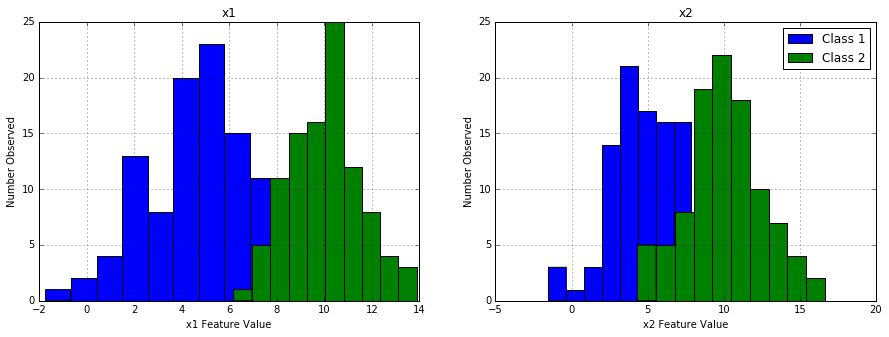

In [10]:
fig, axs = plt.subplots(1,2)

axs[0].set_title(columns[0])
axs[1].set_title(columns[1])

axs[0].set_xlabel("x1 Feature Value")
axs[1].set_xlabel("x2 Feature Value")

axs[0].set_ylabel("Number Observed")
axs[1].set_ylabel("Number Observed")

x1[data["class"] == 1].hist(ax=axs[0], figsize=(15,5))
x1[data["class"] == 2].hist(ax=axs[0])

x2[data["class"] == 1].hist(ax=axs[1], label="Class 1")
x2[data["class"] == 2].hist(ax=axs[1], label="Class 2")

axs[1].legend()

Yes, x1 is more discriminatory than x2 because the ω1 and ω2 histograms overlap less for feature x1 as they do for feature x2.

### (b) Rule: If x1 + x2 − 15 < 0, x ∈ ω1 else x ∈ ω2

Correctly classified: 190 data points (97 as w1 and 93 as w2)
Incorrectly classified: 10 data points(7 as w1 and 3 as w2)
Total: 200 data points
Error rate 10/200 = 0.05


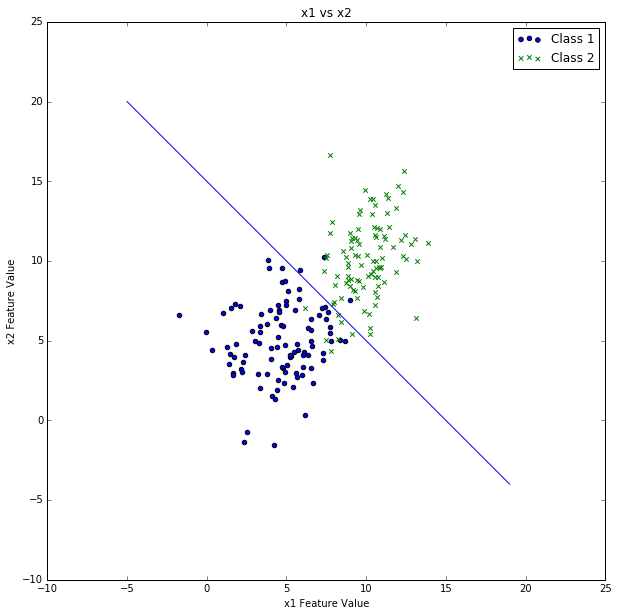

In [11]:
fig, axs = plt.subplots(1,1)

data[data["class"] == 1].plot.scatter(x="x1", y="x2", c="blue", marker="o", ax=axs, figsize=(10,10), label="Class 1")
data[data["class"] == 2].plot.scatter(x="x1", y="x2", c="green", marker="x", ax=axs, label="Class 2")

axs.legend()

axs.set_title("x1 vs x2")

axs.set_xlabel("x1 Feature Value")
axs.set_ylabel("x2 Feature Value")

# Solve rule for x2 => x2 = 15 - x and plot decision boundary
x1 = range(-5, 20)
x2 = [15-x for x in x1]

plt.plot(x1, x2)

# Find correctly and incorrectly classified data points
correct_w1, incorrect_w1, correct_w2, incorrect_w2 = 0, 0, 0, 0
for i, row in data.iterrows():
    if row["x1"] + row["x2"] - 15 < 0:
        if row["class"] == 1:
            correct_w1 += 1
        else:
            incorrect_w1 += 1
    else:
        if row["class"] == 2:
            correct_w2 += 1
        else:
            incorrect_w2 += 1
            
total = correct_w1+incorrect_w1+correct_w2+incorrect_w2
correct_total = correct_w1 + correct_w2
incorrect_total = incorrect_w1 + incorrect_w2
output = """Correctly classified: {} data points ({} as w1 and {} as w2)
Incorrectly classified: {} data points({} as w1 and {} as w2)
Total: {} data points\nError rate {}/{} = {}"""
print(output.format(correct_total, correct_w1, correct_w2, incorrect_total, incorrect_w1, \
                    incorrect_w2, total, incorrect_total, total, incorrect_total/total))

In [12]:
%%latex
$$confusion = \begin{bmatrix}97&7\\3&93\end{bmatrix}$$

<IPython.core.display.Latex object>

### (c) Rule: If x1 + x2 − 12 < 0, x ∈ ω1 else x ∈ ω2

Correctly classified: 173 data points (73 as w1 and 100 as w2)
Incorrectly classified: 27 data points(0 as w1 and 27 as w2)
Total: 200 data points
Error rate 27/200 = 0.135


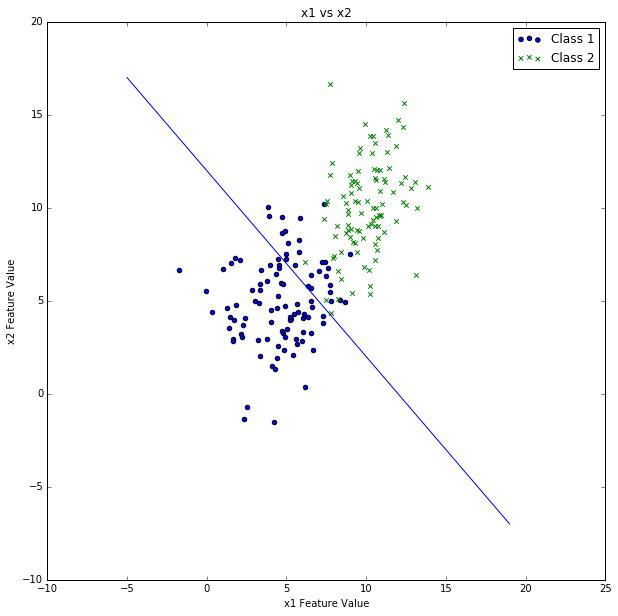

In [13]:
fig, axs = plt.subplots(1,1)

data[data["class"] == 1].plot.scatter(x="x1", y="x2", c="blue", marker="o", ax=axs, figsize=(10,10), label="Class 1")
data[data["class"] == 2].plot.scatter(x="x1", y="x2", c="green", marker="x", ax=axs, label="Class 2")

axs.legend()

axs.set_title("x1 vs x2")

axs.set_xlabel("x1 Feature Value")
axs.set_ylabel("x2 Feature Value")

# Solve rule for x2 => x2 = 15 - x and plot decision boundary
x1 = range(-5, 20)
x2 = [12-x for x in x1]

plt.plot(x1, x2)

# Find correctly and incorrectly classified data points
correct_w1, incorrect_w1, correct_w2, incorrect_w2 = 0, 0, 0, 0
for i, row in data.iterrows():
    if row["x1"] + row["x2"] - 12 < 0:
        if row["class"] == 1:
            correct_w1 += 1
        else:
            incorrect_w1 += 1
    else:
        if row["class"] == 2:
            correct_w2 += 1
        else:
            incorrect_w2 += 1
            
total = correct_w1+incorrect_w1+correct_w2+incorrect_w2
correct_total = correct_w1 + correct_w2
incorrect_total = incorrect_w1 + incorrect_w2
output = """Correctly classified: {} data points ({} as w1 and {} as w2)
Incorrectly classified: {} data points({} as w1 and {} as w2)
Total: {} data points\nError rate {}/{} = {}"""
print(output.format(correct_total, correct_w1, correct_w2, incorrect_total, incorrect_w1, \
                    incorrect_w2, total, incorrect_total, total, incorrect_total/total))

In [14]:
%%latex
$$confusion = \begin{bmatrix}73&27\\0&100\end{bmatrix}$$

<IPython.core.display.Latex object>